## Well Log Data Exploration 

Among the 41 wells discussed before, there are a couple of them with cores in the intervals of interest. Moreover, some have petrophysical measurements of those cores. We will work with the _CAPELLE-01_ well. 

Well logs in LAS format (and other formats) can be downloaded from [NLOG data center](https://www.nlog.nl/datacenter/brh-overview). Search by CAPELLE-01, go to tab _LogsLIS/LAS_ and download the _2571_cap01_1985_comp.las_ file. This file is a composite log of all available wireline logs.


In this notebook we will:
- Load and read LAS files using lasio 
- Load and read CSV files with pandas 
- Plot geophysical well logs using matplotlib 

## Set up
Make sure you have installed [lasio](https://lasio.readthedocs.io/en/latest/) and pandas packages to be able to read well logs in standard LAS file format. 

In [1]:
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

#< Use this for static figures
%matplotlib inline   
# < Use this for interactive figures (zoom in/out, save, etc.)
#%matplotlib widget  

Well logs contain values that indicate that there is no measurement taken at those depths. The _valtonan_ function let us prepare data before processing and visualizing by converting null values to NaN. Whereas _remove_last_ function helps to make clean graphs of the curves.

In [2]:
# This function converts absent values to NaN
# E.g. null = -999.25 > Type <print(lasfile.well)> to find out this value

def valtonan(inp, val=-999.25):
    """Convert all 'val' to NaN's."""
    inp[inp==val] = np.nan
    return inp

#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))


## Loading LAS files
One simple way of reading a LAS file is by using _lasio_ library. 

To look at the header call the _.well_ function. Note that measurements start at the bottom of the well. 

In [3]:
# Read a single file  
lasfile = lasio.read(os.path.join("../data/raw/logs/2571_cap01_1985_comp.las"))

In [4]:
print(lasfile.well)

Mnemonic  Unit  Value       Description        
--------  ----  -----       -----------        
STRT      M     3688.8003   First Index Value  
STOP      M     30.2001     Last Index Value   
STEP      M     -0.1        Frame Spacing      
NULL            -999.25     Absent Value       
WELL            CAPELLE-01  Well Name          
FLD             UNKNOWN     Field Name         
CNTY                        County             
STAT                        State              
CTRY                        Country            
LOC                         Location           
API                         API Number         
DATE                        Date               
COMP            NAM         Company Name       
SRVC                        Service Company    


Drilling parameters can be also displayed. They are useful to integrate well log data with seismic and geologic models.

In [5]:
print(lasfile.params)

Mnemonic  Unit  Value           Description                                                  
--------  ----  -----           -----------                                                  
TDL       M     3700.0          Total Depth (Logger)                                         
TDD       M     3700.0          Total Depth (Driller)                                        
UBID            2571            Unique Borehole Id                                           
PDAT            Mean Sea Level  Permanent Datum                                              
EPD       M     0.0             Elevation of Permanent Datum (PDAT) above Mean Sea Level     
LMF             Rotary Table    Logging Measured From (Name of Logging Elevation Reference)  
APD       M     3.77            Elevation of Depth Reference (LMF) Above Permanent Datum     


## Well Log Curves
Let's display a list of the curves in this LAS file. Note that curve mnemonics do not have a description. If you are unfamiliar with those mnemonic, check [CurveNam.es](http://curvenam.es/), which is a useful fuzzy lookup of wireline log mnemonics. Or check directly on [SLB website](https://www.apps.slb.com/cmd/index.aspx) and 
[Halliburton website](https://www.halliburton.com/en/resources/lwd-curve-mnemonics).

PS. Here, the curve mnemonic _DRHO_ stands for for Density Correction, which may be useful for log quality control but not neccesarily for log interpretation. The DRHO curve is the difference between the short- and long-spaced density measurements. It is used as a quality indicator of the bulk density data. DRHO values larger than 0.1 g/cm3 suggest unreliable density data. This can be correlated with high caliper readings due to probable poor contact with the wall borehole.


In [6]:
print(lasfile.curves)

Mnemonic  Unit  Value  Description        
--------  ----  -----  -----------        
DEPT      M            1     Index curve  
GR        GAPI         2     SNAM         
DT        US/F         3     SNAM         
RHOB      G/C3         4     SNAM         
DRHO      G/C3         5     SNAM         
NPHI      V/V          6     SNAM         


In [7]:
for curve in lasfile.curves:
    print(curve.mnemonic + ": " + str(curve.data))

DEPT: [3688.8003 3688.7003 3688.6003 ...   30.4001   30.3001   30.2001]
GR: [122.216843 122.511719 123.66333  ...  20.331074        nan        nan]
DT: [nan nan nan ... nan nan nan]
RHOB: [2.669157 2.669874 2.669091 ...      nan      nan      nan]
DRHO: [-0.002885 -0.002564 -0.002655 ...       nan       nan       nan]
NPHI: [nan nan nan ... nan nan nan]


## Well log visualization

This is a simple way of inspecting the curves we just read from that LAS file. You can identify the intervals where the tool did not measure or where there are anomalous measurements to filter before rpocessing.

Note that to plot the sonic transit time (DT) we have converted its units from _us/ft_ to _m/s_.

This is an interactive plot. Use the controls on the upper left corner to zoom in and out.

In [8]:
# These are the variable names, i.e. curve mnemonic
lasfile.keys() 

['DEPT', 'GR', 'DT', 'RHOB', 'DRHO', 'NPHI']

In [9]:
# --> To-DO
# Looking for invalid values
# valtonan(lasfile, val=-999.25)

Test for creating a funtion

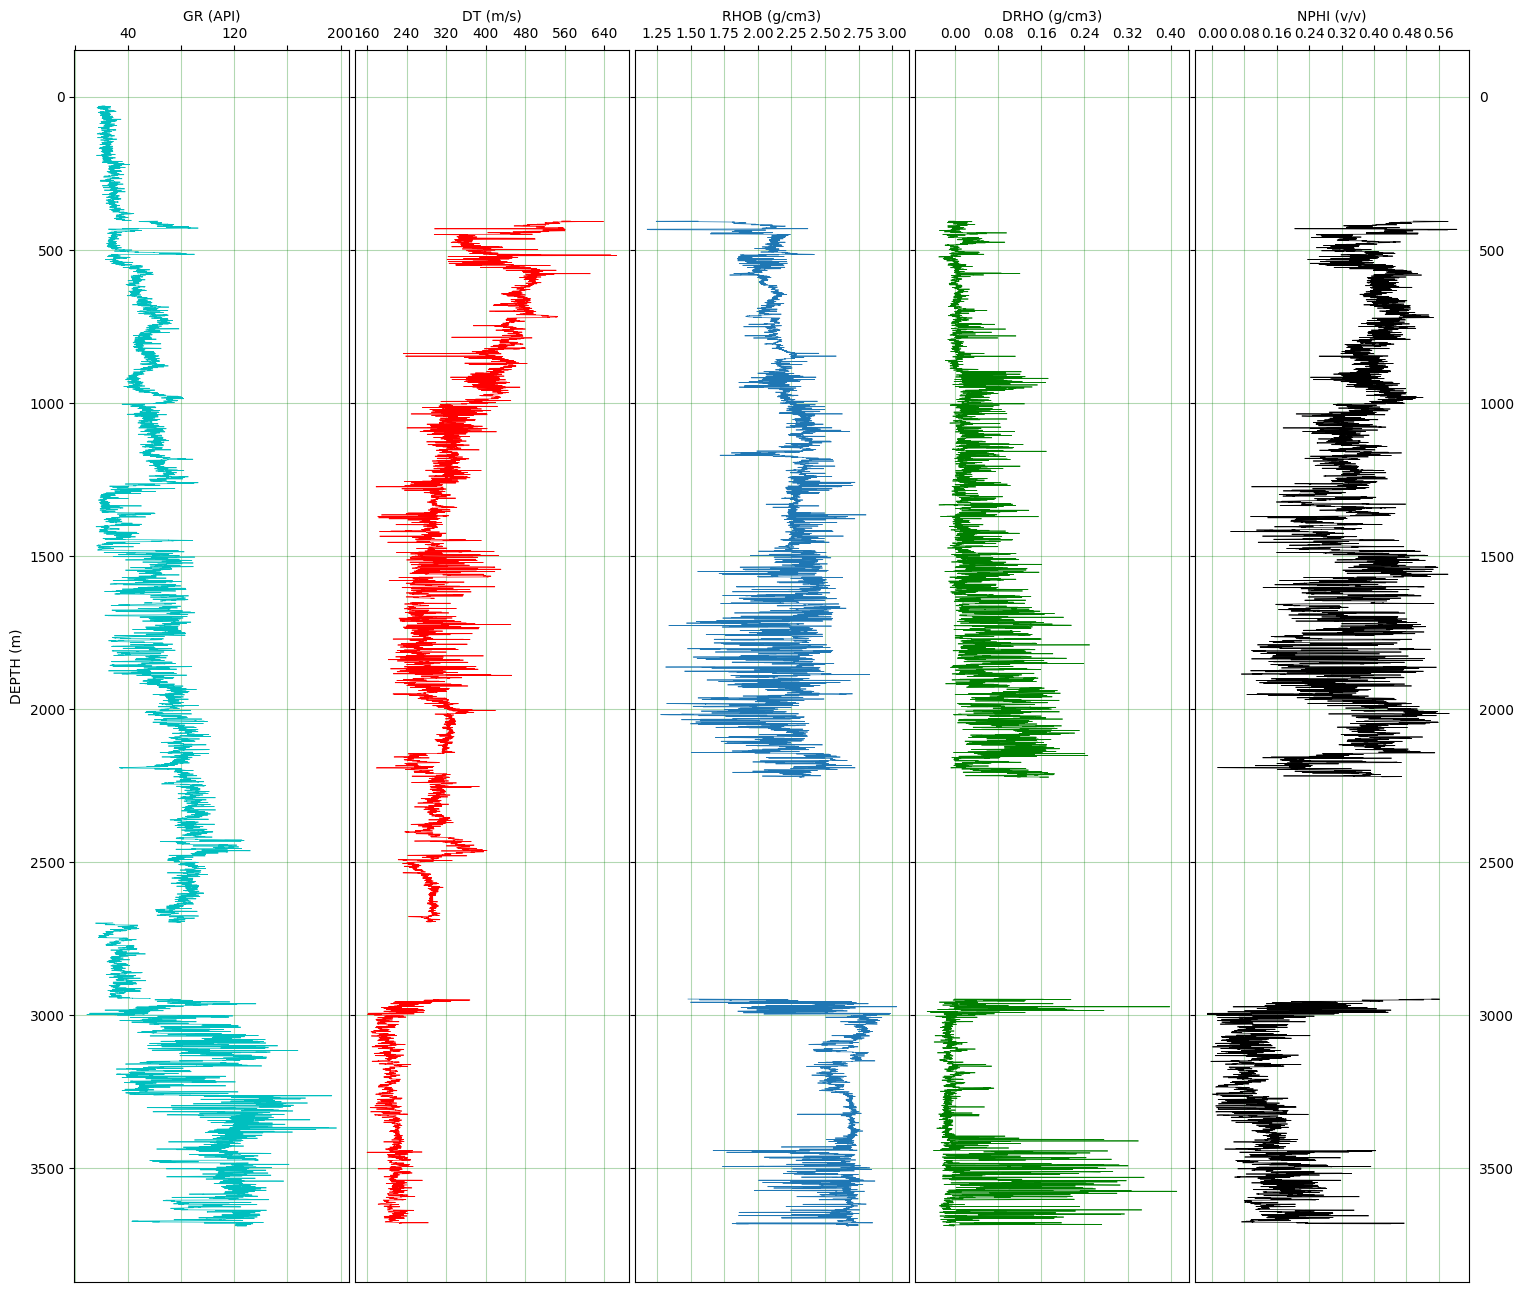

In [10]:
# Plotting curves along well total depth

f1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(18,16))
f1.subplots_adjust(wspace=0.02)
plt.gca().invert_yaxis()

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 6

# Track 1: Gamma Ray
ax1.plot(lasfile['GR'], lasfile['DEPT'],'c', linewidth=0.5)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top') 
ax1.set_xlabel('GR (API)')
ax1.set_ylabel('DEPTH (m)')
ax1.grid(True, c="g", alpha=0.3)

plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

# Track 2: Sonic (velocities)
ax2.plot((lasfile['DT']/0.3048), lasfile['DEPT'], 'r',label='DTCO',linewidth=0.5)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 
ax2.set_xlabel('DT (m/s)')
ax2.grid(True, c="g", alpha=0.3)
remove_last(ax2)  

# Track 3: RHOB (Bulk Density)
ax3.plot(lasfile['RHOB'], lasfile['DEPT'], linewidth=0.5)
ax3.set_xlabel('RHOB (g/cm3)',va = 'top')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.grid(True, c="g", alpha=0.3)
remove_last(ax3)  

# Track 4: DRHO
ax4.plot(lasfile['DRHO'], lasfile['DEPT'], 'g',linewidth=0.5)
ax4.set_xlabel('DRHO (g/cm3)')
ax4.xaxis.tick_top()
ax4.xaxis.set_label_position('top')
ax4.grid(True, c="g", alpha=0.3) 
remove_last(ax4)  

# Track 5: NPHI
ax5.plot(lasfile['NPHI'], lasfile['DEPT'], 'k', linewidth=0.5)
ax5.set_xlabel('NPHI (v/v)',va = 'top')
ax5.xaxis.tick_top()
ax5.xaxis.set_label_position('top')
ax5.grid(True, c="g", alpha=0.3) 
remove_last(ax5)  

plt.show()


## Plotting petrophysical properties from cores

These experimental measurements are available in a variety of file formats. In this case we have two files in .csv format, which are handled with the _pandas package_. We are interested in plotting together well logs and core measurements. Therefore, columns two and three, which correspond to core top and bottom depths, are relevant. These are the vertical lines (blue, red, green) in track 1 (Figure 2).

In [11]:
# Reading the .csv file containing depths and properties measured on cores 
cores = pd.read_csv('../data/raw/cores/CAP-01_cores.csv')

In [12]:
cores.head()

,Core,Top,Bottom,Length,Formations,Unnamed: 5,Top Formation,Bottom Formation,Kernmetingen,Operator,Year of core
0,CAP-01,3112.0,3125.0,13.0,Röt Randzandsteen Laagpakket,NaN,3081.0,3115.0,YES,NAM,1985.0
1,NaN,3154.0,3168.0,14.0,Onder-Röt Randkleisteen Laagpakket,NaN,3115.0,3140.0,YES,NaN,NaN
2,NaN,3205.0,3223.0,18.0,Solling Kleisteen Laagpakket,NaN,3140.0,3149.0,YES,NaN,NaN
3,NaN,NaN,NaN,NaN,Basale Solling Zandsteen Laagpakket,NaN,3149.0,3160.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Detfurth Kleisteen Laagpakket,NaN,3160.0,3168.0,NaN,NaN,NaN


In [13]:
# We are making an array of top and bottom depths to plot the core intervals (m)
# (x1, x2), (bottom, top), 'color'
c = [(0, 0), (cores['Bottom'][0], cores['Top'][0]), 'b',
     (0, 0), (cores['Bottom'][1], cores['Top'][1]), 'r', 
     (0, 0), (cores['Bottom'][2], cores['Top'][2]), 'g']

A second .csv file contains the actual measurements taken on cores. This file contains the units as part of the key name, which would be removed during the data cleaning phase. In this notebook, we use the keys as they are.

In [14]:
# Reading the .csv file containinig experimental petrophysical measurements 
km = pd.read_csv('../data/raw/cores/CAP-01_kernmetingen.csv')

Using .head() and .tail() functions, we can explore the data to find invalid values, outliers, etc. Note that lines 1, 9 and 147 have a dash ('-') instead of null (or NaN).  

In [15]:
km.head(10)

,nummer,deipte (m),Porositeit (%),hor. Perm (mD),Korreldichtheid (g/cm³)
0,K-0001,3112.05,13.2,10,2.65
1,K-0001C,3112.05,13.2,10,-
2,K-0002,3112.35,12.5,7.7,2.65
3,K-0002N,3112.35,12.6,10,2.65
4,K-0003,3112.65,14.0,29,2.65
5,K-0004,3112.96,12.7,11,2.66
6,K-0005,3113.24,13.4,20,2.65
7,K-0006,3113.63,8.4,11,2.72
8,K-0007,3114.05,12.2,89,2.65
9,K-0007C,3114.05,12.2,89,-


In [16]:
km.tail(10)

,nummer,deipte (m),Porositeit (%),hor. Perm (mD),Korreldichtheid (g/cm³)
147,K-0133C,3221.19,11.6,4.7,-
148,K-0134,3221.49,7.6,0.47,2.67
149,K-0135,3221.79,11.1,2.8,2.64
150,K-0136,3222.09,12.2,10,2.65
151,K-0136N,3222.09,12.2,12,2.65
152,K-0137,3222.39,12.1,6.8,2.65
153,K-0138,3222.69,10.3,2.3,2.65
154,K-0139,3222.99,7.8,1.3,2.68
155,K-0140,3223.29,13.0,8.6,2.66
156,K-0141,3223.60,11.7,4.8,2.66


Indeed, the presence of strings ('-') makes data appear as object, not as an array. For what one can not plot them. The two columns that contain numerical values are "depth" and "porosity". 

In [17]:
#km.describe()

In [18]:
# Print how many and which properties 
# Note that the data type is Object, not array
km.columns

Index(['nummer', 'deipte (m)', 'Porositeit (%)', 'hor. Perm (mD)',
       'Korreldichtheid (g/cm³)'],
      dtype='object')

In [19]:
# Depth interval where there are logs
core_int = km['deipte (m)']
core_int [(core_int >= km['deipte (m)'].min()) & (core_int <= km['deipte (m)'].max())]

0      3112.05
1      3112.05
2      3112.35
3      3112.35
4      3112.65
        ...   
152    3222.39
153    3222.69
154    3222.99
155    3223.29
156    3223.60
Name: deipte (m), Length: 157, dtype: float64

In [20]:
km['Korreldichtheid (g/cm³)']

0      2.65
1         -
2      2.65
3      2.65
4      2.65
       ... 
152    2.65
153    2.65
154    2.68
155    2.66
156    2.66
Name: Korreldichtheid (g/cm³), Length: 157, dtype: object

The following code removes strings (object) and converts data into arrays (float).

In [21]:
# Converting '-' into Nan and removing outliers
km2= valtonan(km, val='-')
km2= valtonan(km, val='0.66')
den2=km2['Korreldichtheid (g/cm³)']
dd2 = np.array(den2.values, dtype=float)
np.nanmin(dd2) 
np.nanmax(dd2)

2.98

In [22]:
por2=km2['Porositeit (%)']
p2 = np.array(por2.values, dtype=float)
np.nanmin(p2), np.nanmax(p2)

(0.7, 18.1)

In [23]:
perm2=km2['hor. Perm (mD)']
p3 = np.array(perm2.values, dtype=float)
np.nanmin(p3), np.nanmax(p3)

(0.01, 89.0)

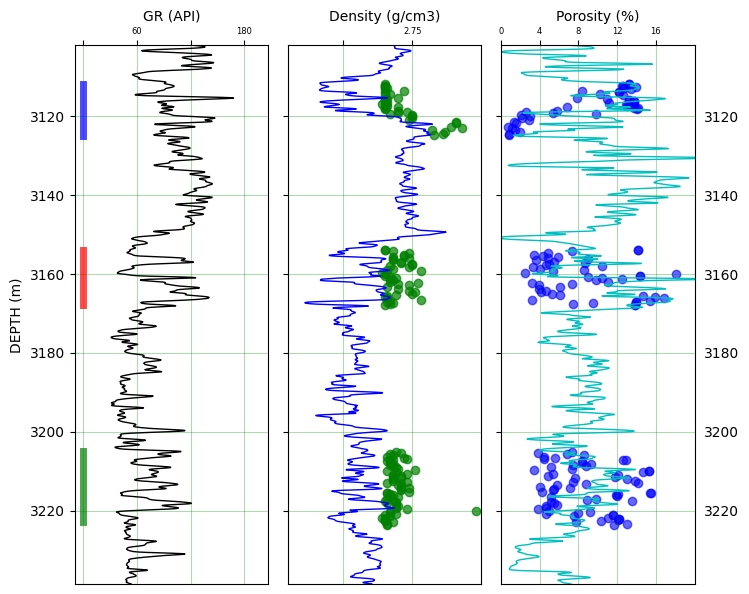

In [24]:
# Plotting petrophysical measurements and curves

f3, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(8,7))
f3.subplots_adjust(wspace=0.1)
plt.gca().invert_yaxis()
plt.ylim(km['deipte (m)'].max()+15,km['deipte (m)'].min()-10)

# So that y-tick labels appear on left and right
plt.tick_params(labelright=True)

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 6

# Track 1: GR
ax1.plot(*c, linewidth=5,alpha=0.7)
ax1.plot(lasfile['GR'], lasfile['DEPT'],'k', linewidth=1)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top') 
ax1.set_xlabel('GR (API)')
ax1.set_ylabel('DEPTH (m)')
ax1.grid(True, c="g", alpha=0.3)

plt.setp(ax1.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax1)  # remove last value of x-ticks, see function defined in first cell

# Track 2: RHOB
ax2.plot(lasfile['RHOB'], lasfile['DEPT'], 'b', linewidth=1)
#ax2.scatter(km['Korreldichtheid (g/cm³)'],km['deipte (m)'],alpha=0.8,c='g')
ax2.scatter(dd2,km['deipte (m)'],alpha=0.7,c='g')
ax2.set_xlabel('Density (g/cm3)',va = 'top')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.grid(True, c="g", alpha=0.3)
ax2.set_xlim(2.3, 3.0)
plt.setp(ax2.get_xticklabels()[1::2], visible=False)  # Hide every second tick-label
remove_last(ax2)  

# Track 5: NPHI
ax3.plot(lasfile['NPHI']*100, lasfile['DEPT'], 'c', linewidth=1)
ax3.scatter(km['Porositeit (%)'],km['deipte (m)'],alpha=0.6,c='b')
ax3.set_xlabel('Porosity (%)',va = 'top')
ax3.set_xlim(0,20)
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
ax3.grid(True, c="g", alpha=0.3) 
remove_last(ax3)  

plt.show()


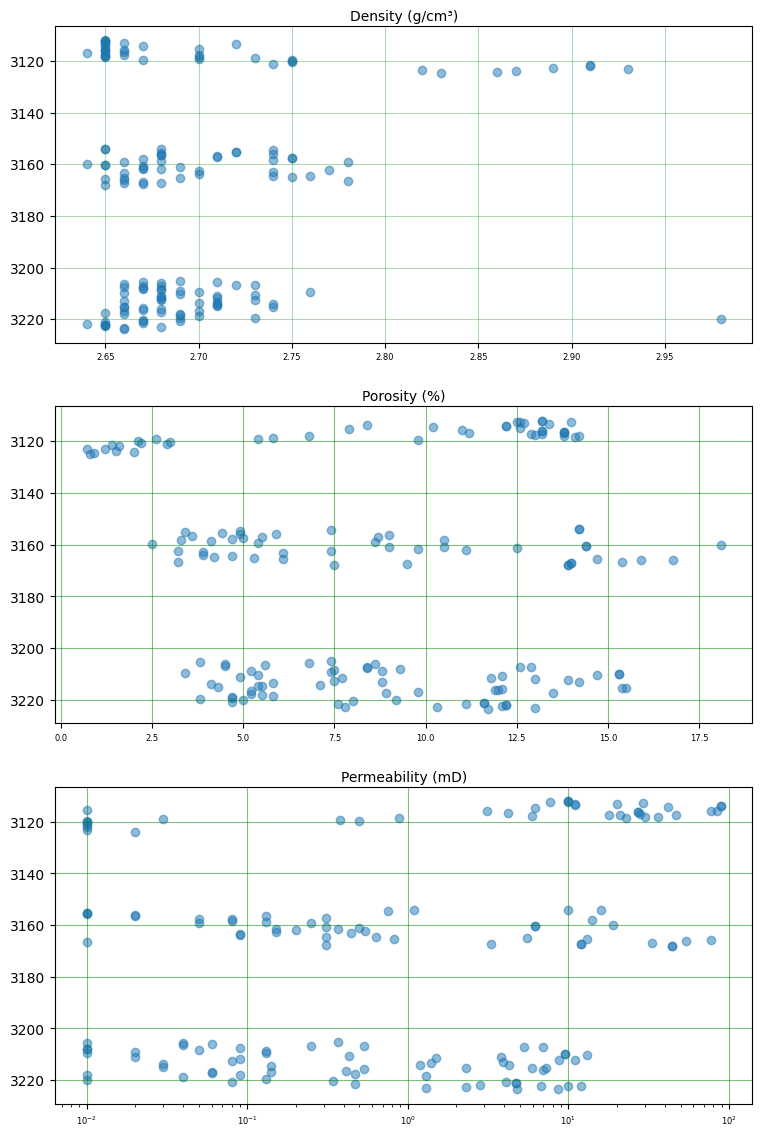

In [25]:
#Plotting the depth intervals with cores

f4, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, figsize=(9,14))
plt.gca().invert_yaxis()

# Change tick-label globally
mpl.rcParams['xtick.labelsize'] = 6

# Track 1: RHOB
#ax1.plot(*c1, linewidth=5,alpha=0.7)
ax1.scatter(dd2,km['deipte (m)'],alpha=0.5)
ax1.set_xlabel('Density (g/cm³)',va = 'top')
ax1.xaxis.set_label_position('top')
ax1.grid(True, c="g", alpha=0.3) 

#ax2.plot(*c2, linewidth=5,alpha=0.7)
ax2.scatter(p2,km['deipte (m)'],alpha=0.5)
ax2.set_xlabel('Porosity (%)',va = 'top')
ax2.xaxis.set_label_position('top')
ax2.grid(True, c="g", alpha=0.5) 

#ax3.plot(*c3, linewidth=5,alpha=0.7)
ax3.scatter(p3,km['deipte (m)'],alpha=0.5)
ax3.set_xlabel('Permeability (mD)',va = 'top')
ax3.set_xscale('log')
ax3.xaxis.set_label_position('top')
ax3.grid(True, c="g", alpha=0.5)

plt.show()

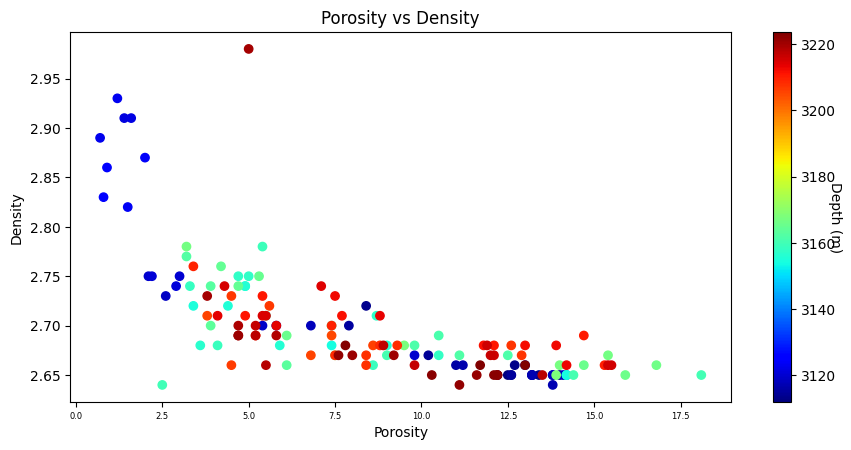

In [26]:
#Plotting the depth intervals with cores
#plt.style.use("seaborn")
f4 = plt.figure(figsize=plt.figaspect(0.45))
plt.scatter(
    x=p2,
    y=dd2,
    c=km['deipte (m)'],
    cmap="jet")
plt.title("Porosity vs Density")
plt.xlabel("Porosity")
plt.ylabel("Density")
cbar = plt.colorbar()
cbar.set_label('Depth (m)',rotation=270)


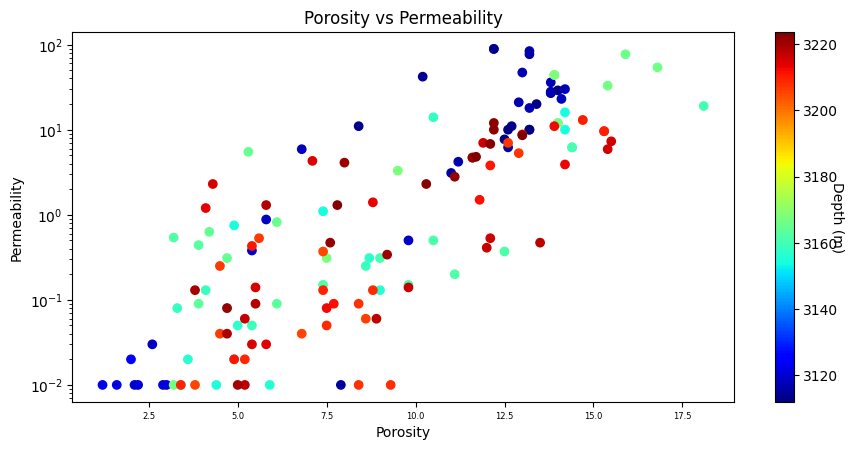

In [27]:
#Plotting the depth intervals with cores
#plt.style.use("seaborn")
f5 = plt.figure(figsize=plt.figaspect(0.45))
plt.scatter(
    x=p2,
    y=p3,
    c=km['deipte (m)'],
    cmap="jet")
plt.title("Porosity vs Permeability")
plt.xlabel("Porosity")
plt.ylabel("Permeability")
plt.yscale('log')
cbar = plt.colorbar()
cbar.set_label('Depth (m)',rotation=270)
